# Connect with BigQuery via Google Colab

**Question #1**: WHY do we eed to use SQL (BigQuery) in integration with Python?

**Question #2**: Notebooks is a `web-based` `interactive` `computing` platform. WHY is it so popular among Data practitioner?

> If you cannot answer now, scroll down - finish the assignment, then come back and think about the questions. 

In this notebook, we introduce *Google Colab* that enable you to write and execute python code through browser (without any local set-up) and convenient to share with the co-works the same fashion with sharing links of Google Docs/Sheets.

You can open `https://colab.research.google.com/`, and upload this notebooks.

### Provide credentials 

You will see that it is extremely conveninent to authenticate the access to BigQuery via _Google Colab_. The authentication is via your gmail account.

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


### Query data directly from BigQuery

Optional: `google.colab.data_table` is to display large pandas dataframes as an interactive data tables (Hint: The command in notebooks start with `%` called [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html))

In [2]:
%load_ext google.colab.data_table

Query the data from BigQuery by SQL. Google Colab provide magic commands `%%bigquery` that make it very conveniently to write SQL. 

Below we query data and store it to `df_bq` as a `pandas.DataFrame`

In [4]:
%%bigquery --project analytics-training-hub df_bq
SELECT 
  id, 
  `by`,
  score, 
  time, 
  title, 
  descendants, 
  author 
FROM `bigquery-public-data.hacker_news.stories` 
LIMIT 10

### Work with Python

OK then! So why we ever need to query BigQuery in the notebook rather than BigQuery UI Console? 

1. With the output from BigQuery, you can use it as input to other cool and handy tools in Python (visualization, statistics, modeling, etc.)
2. Everything (SQL code, python code, charts, table outptus, comments/docs) is now on the same notebook, which is by nature already a doc/reports

In [14]:
df_bq

,id,by,score,time,title,descendants,author
0,6994551,Mrfun,0,1388564347,Why do women cheat more than Men?,NaN,Mrfun
1,8797924,TanyaSanya,0,1419564648,The Sanya and Tanya Wagner Story,NaN,TanyaSanya
2,6990958,thomaseide,0,1388504423,Insider look at new payment app coming out of ...,NaN,thomaseide
3,7165288,chiquitabowers,0,1391328191,Whitney Houston gone wrong,NaN,chiquitabowers
4,4671267,kogir,0,1401561740,Placeholder,0.0,kogir
5,2148696,kogir,0,1401561740,Placeholder,0.0,kogir
6,3677032,kogir,0,1401561740,Placeholder,0.0,kogir
7,3159635,kogir,0,1401561740,Placeholder,0.0,kogir
8,4774206,kogir,0,1401561740,Placeholder,0.0,kogir
9,3949772,kogir,0,1401561740,Placeholder,0.0,kogir


#### Data Manipulation in Python

Data manipulation is all the actions that you always do with SQL (subset data - rows/columns, groupby, aggregate). Things are same but syntax is different. 



*   You can use [Pandas](https://pandas.pydata.org/). The best way to learn a new data manipulation language is to put it side-by-side with SQL (or any language that you're familiar). See: [Pandas - Comparison with SQL](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html). 
*   Though I don't like Pandas for data manipulation, the syntax is long and not intuitive, not readable
* We will use [DuckDB](https://duckdb.org/docs/guides/python/sql_on_pandas), with SQL syntax and highly optimized performance comparing to Pandas. See: [Efficient SQL on Pandas with DuckDB](https://duckdb.org/2021/05/14/sql-on-pandas.html)


`duckdb` is not available on Google Colab by default. You can run `%pip install`

In [9]:
%pip install duckdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 23.9 MB/s 


In [10]:
import duckdb

In [11]:
# connect to an in-memory database
con = duckdb.connect()

In [12]:
# Query Pandas DataFrame with SQL. Output to stories_per_author_df
sql_string = """
SELECT
  author, 
  COUNT(DISTINCT id) AS stories_cnt
FROM df_bq
GROUP BY 1
"""
stories_per_author_df = con.execute(sql_string).df()
stories_per_author_df.head()

,author,stories_cnt
0,Mrfun,1
1,TanyaSanya,1
2,thomaseide,1
3,chiquitabowers,1
4,kogir,6


Pandas syntax is not very much preferred (IMO), they still have any convenient functionalities

In [13]:
# Glimps into data
stories_per_author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       5 non-null      object
 1   stories_cnt  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [15]:
# Calculate statistics
stories_per_author_df.describe()

,stories_cnt
count,5.000000
mean,2.000000
std,2.236068
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,6.000000


#### Data Visualization

`matplotlib` is the most well-known python package for data visualization. Though `seaborn` is built on top of `matplotlib` with more modern syntax (which enables you to write shorter, simpler code to create a chart)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 

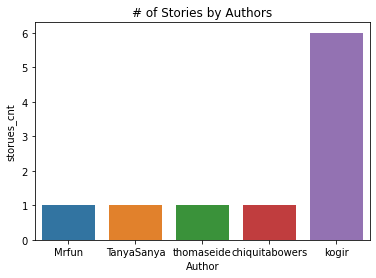

In [18]:
sns.barplot(data=stories_per_author_df, x="author", y="stories_cnt")
plt.title('# of Stories by Authors')
plt.xlabel('Author')
plt.ylabel('storues_cnt')
plt.show()

### TODO: Assignment

Connect to `bigquery-public-data` dataset on Google Colab, load and explore, table: `comments`, `full`, `full_201510`, `stories`.

By `duckdb` or `pandas`: 

1. Explore the data: schema, statistics (mean/max/min). Any comment on the data?
2. Data quality check. What will you check? Any comment on data quality?
3. Find the relationships among tables (what keys to join them)?
4. `THIS IS OUTSIDE OF COLAB NOTEBOOK` Now, to support your job, let's materialize your understanding into a Database Diagram using [DBdiagram.io](https://dbdiagram.io/home)

[DBdiagram.io](https://dbdiagram.io/home) is a tool to create the diagram of Database by code. Please copy and replace to code to file `dbdiagram_template.json` and save it to our git repo.

In [ ]:
#TODO: Your work from here